In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()
plt.style.use("ggplot")

In [8]:
from glob import glob

data_folder = glob("../outputs/*")

tdfs = []

for folder in data_folder:
    files = glob(folder + "/*.csv")
    tdf = pd.concat([pd.read_csv(f) for f in files])
    tdf["generation"] = folder.split("/")[-1]
    tdfs.append(tdf)

data = pd.concat(tdfs)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,generation
0,Bisharp,NaN,assaultvest,defiant,suckerpunch,lowkick,ironhead,knockoff,NaN,85,...,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,20
1,Vileplume,NaN,lifeorb,effectspore,sludgebomb,sleeppowder,gigadrain,hiddenpowerfire,NaN,85,...,NaN,0.0,NaN,30.0,NaN,30.0,NaN,86.0,NaN,20
2,Rotom,rotomfrost,iciumz,levitate,willowisp,voltswitch,painsplit,blizzard,NaN,85,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,88.0,NaN,20
3,Sylveon,NaN,leftovers,pixilate,wish,calmmind,protect,hypervoice,NaN,85,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,83.0,NaN,20
4,Hawlucha,NaN,sitrusberry,unburden,acrobatics,highjumpkick,substitute,swordsdance,NaN,85,...,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,20


Text(0.5, 0, 'Generation')

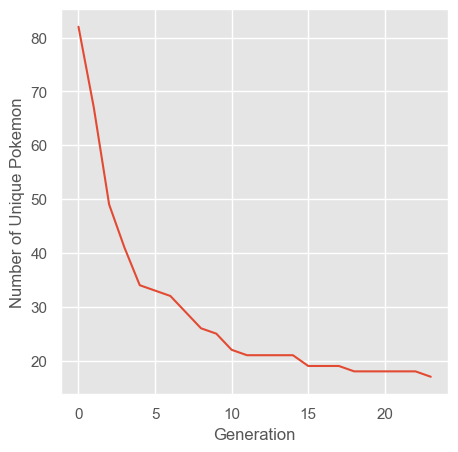

In [17]:
n_poke_per_gen = data.groupby("generation")["0"].nunique().sort_values(ascending=False)
fig, ax = plt.subplots(1, figsize=(5, 5), dpi=100)

ax.plot(np.arange(len(n_poke_per_gen)), n_poke_per_gen)
ax.set_ylabel("Number of Unique Pokemon")
ax.set_xlabel("Generation")

In [6]:
n_poke_per_gen

generation
0     82
1     67
10    22
11    21
12    21
13    21
14    21
15    19
16    19
17    19
18    18
19    18
2     49
3     41
4     34
5     33
6     32
7     29
8     26
9     25
Name: 0, dtype: int64

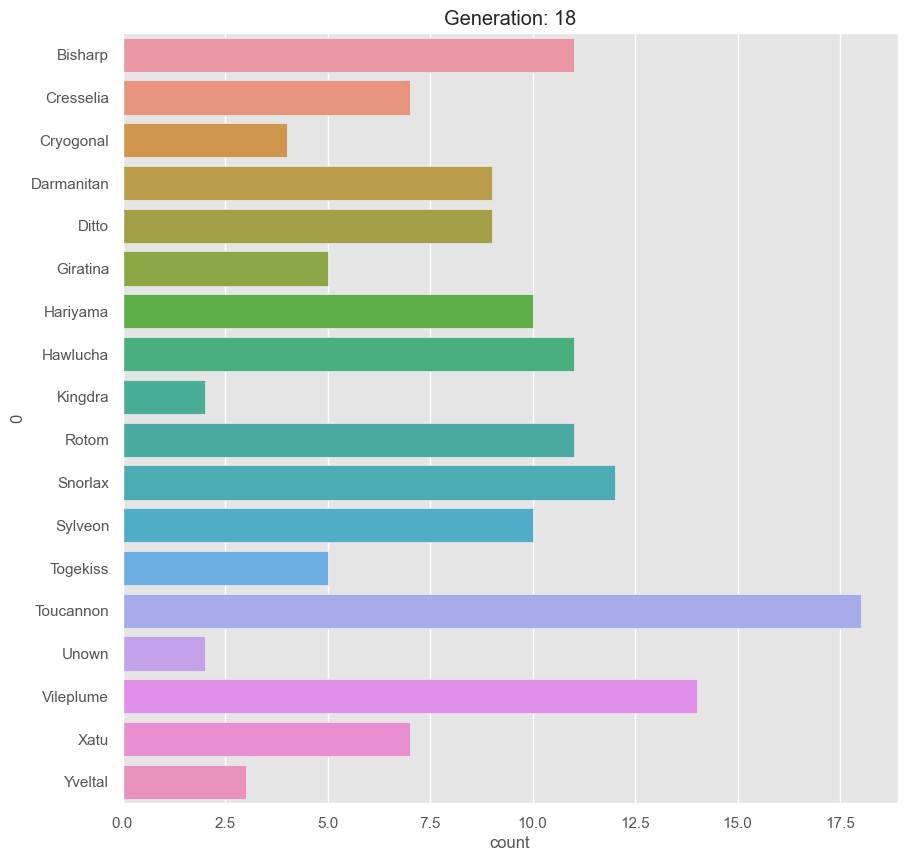

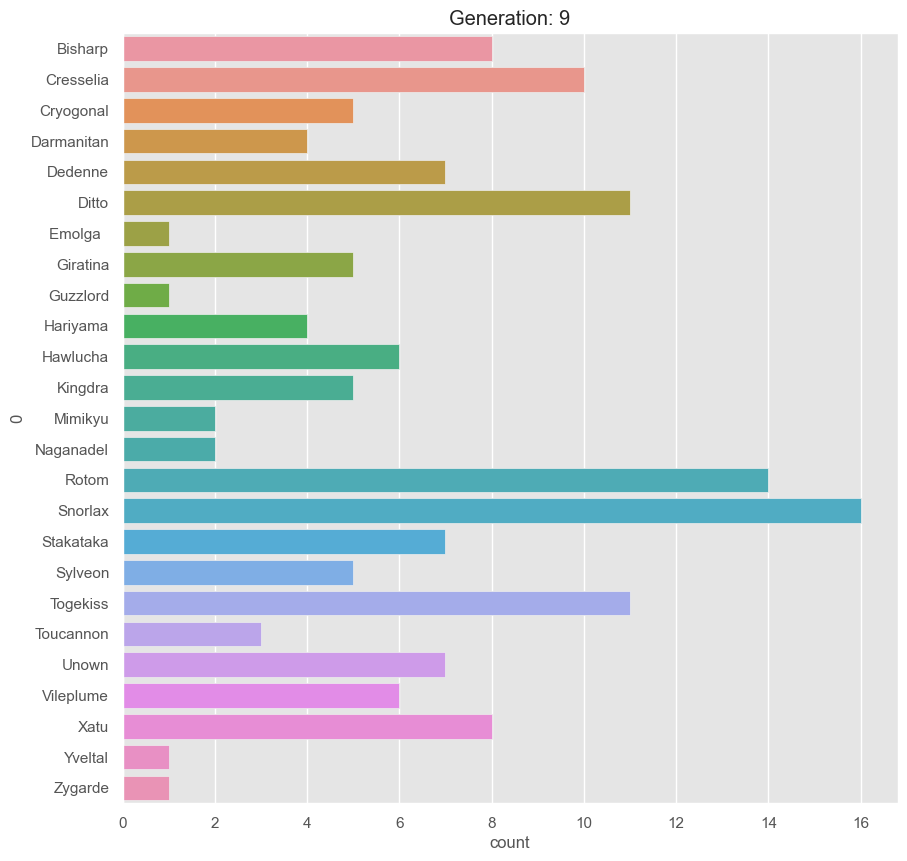

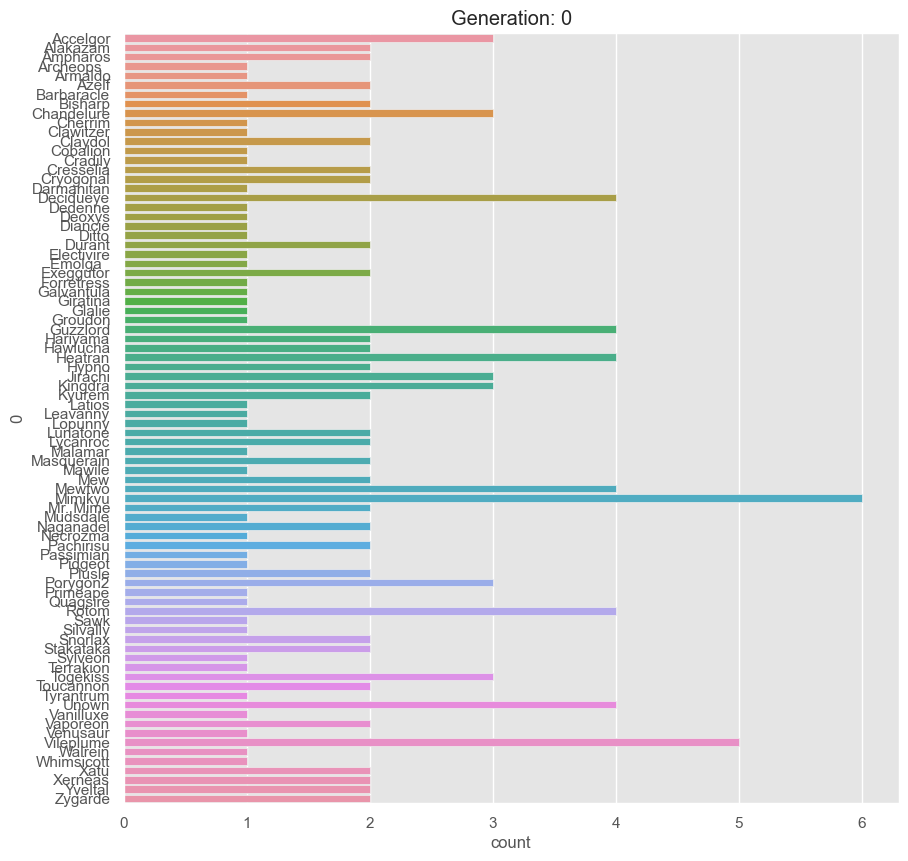

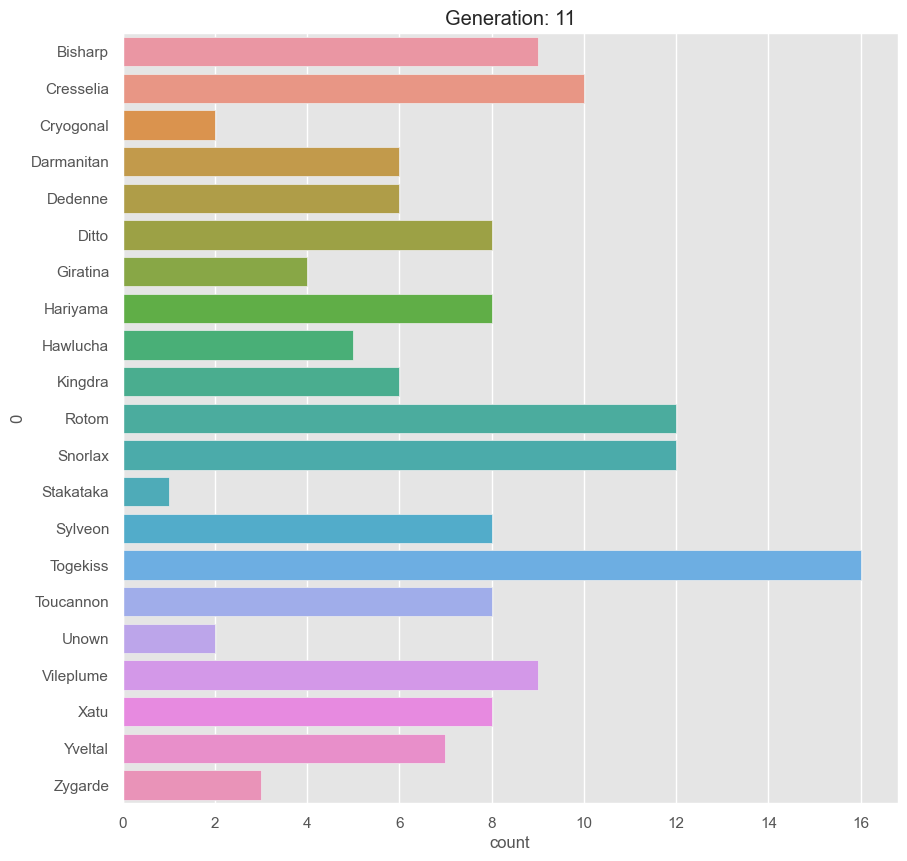

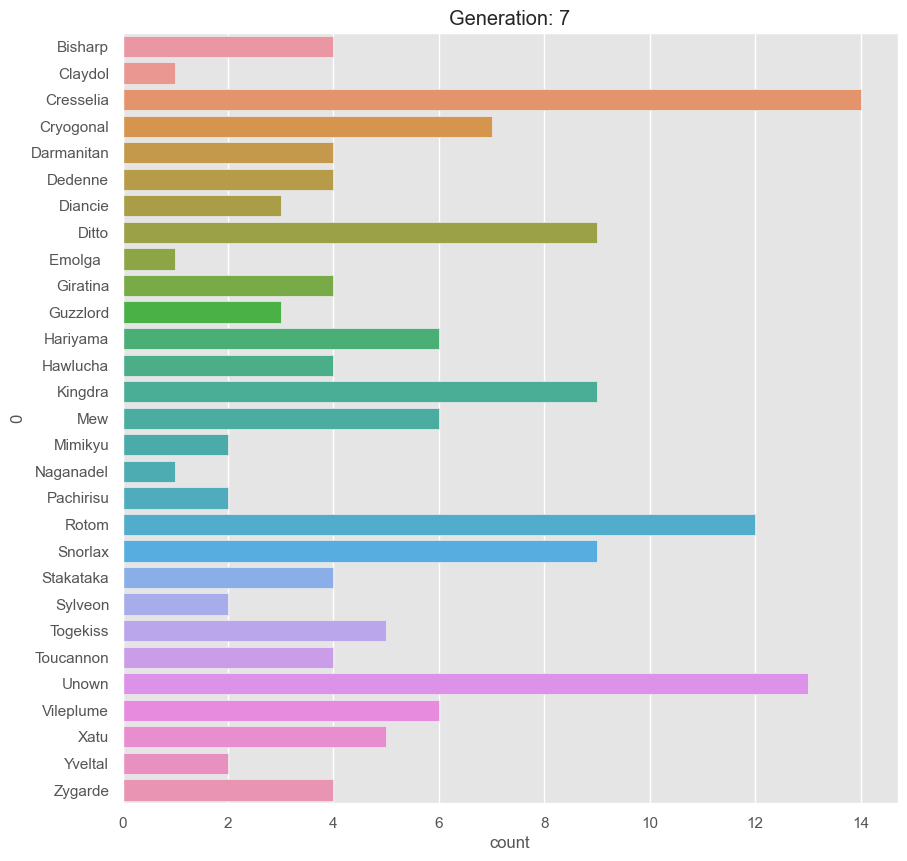

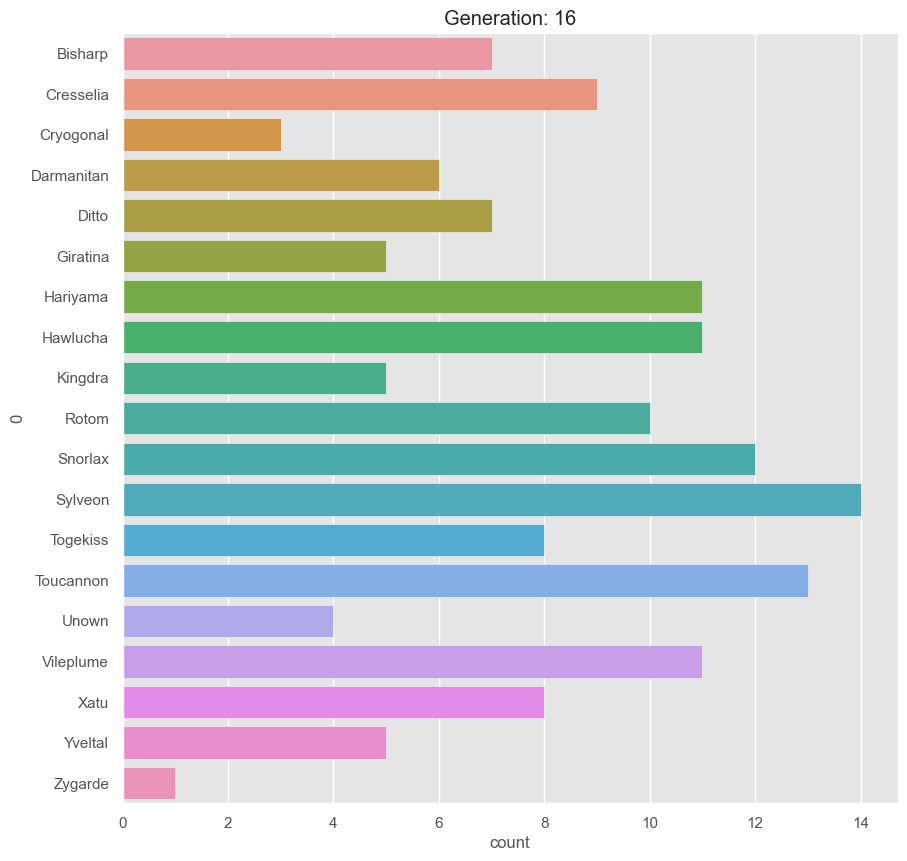

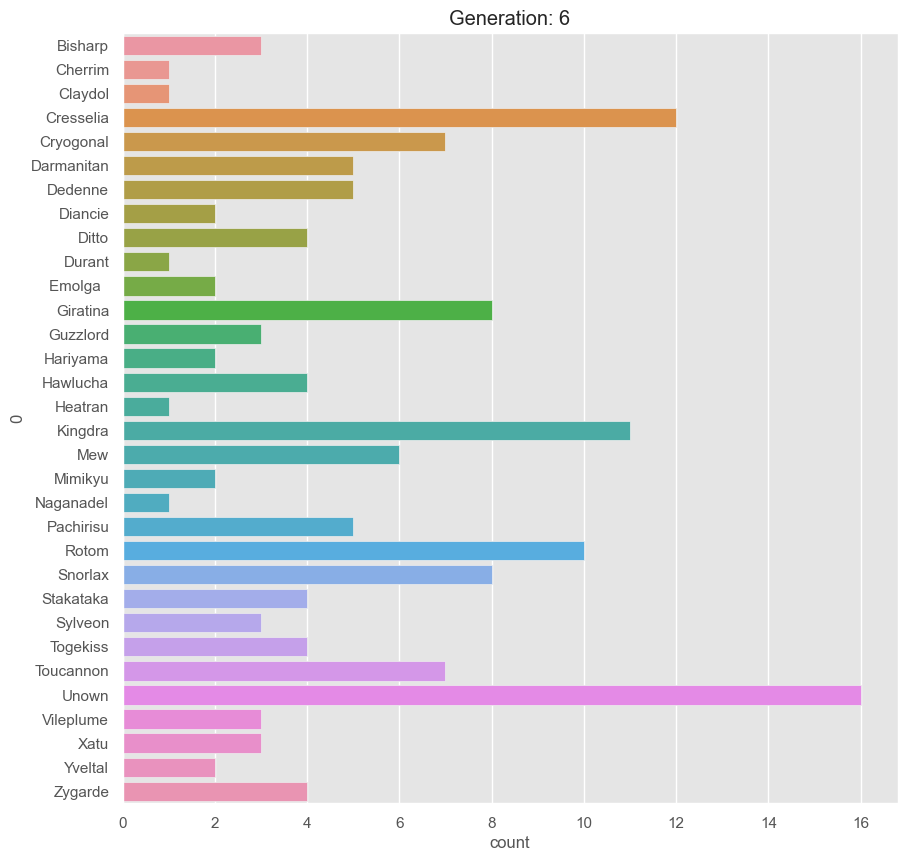

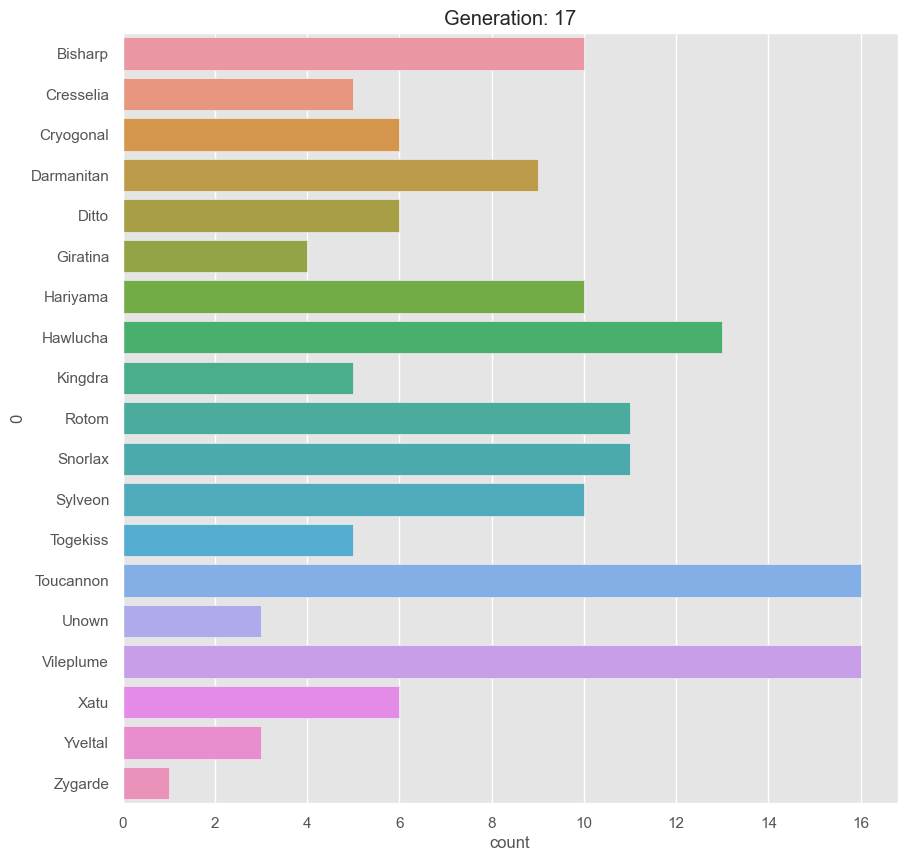

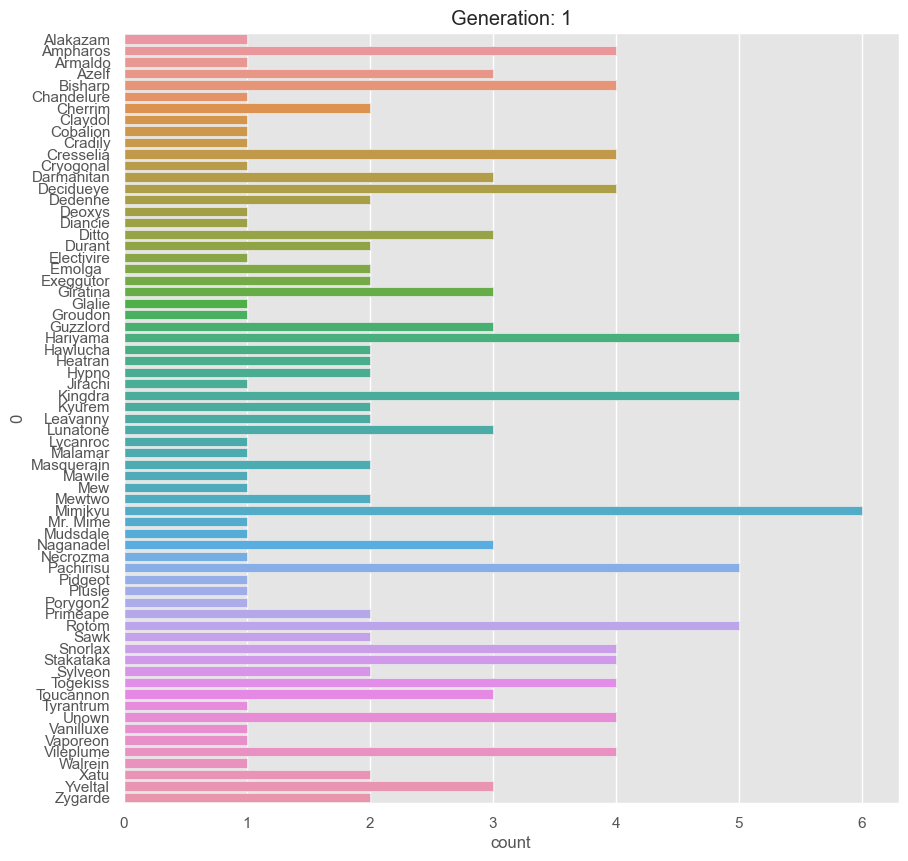

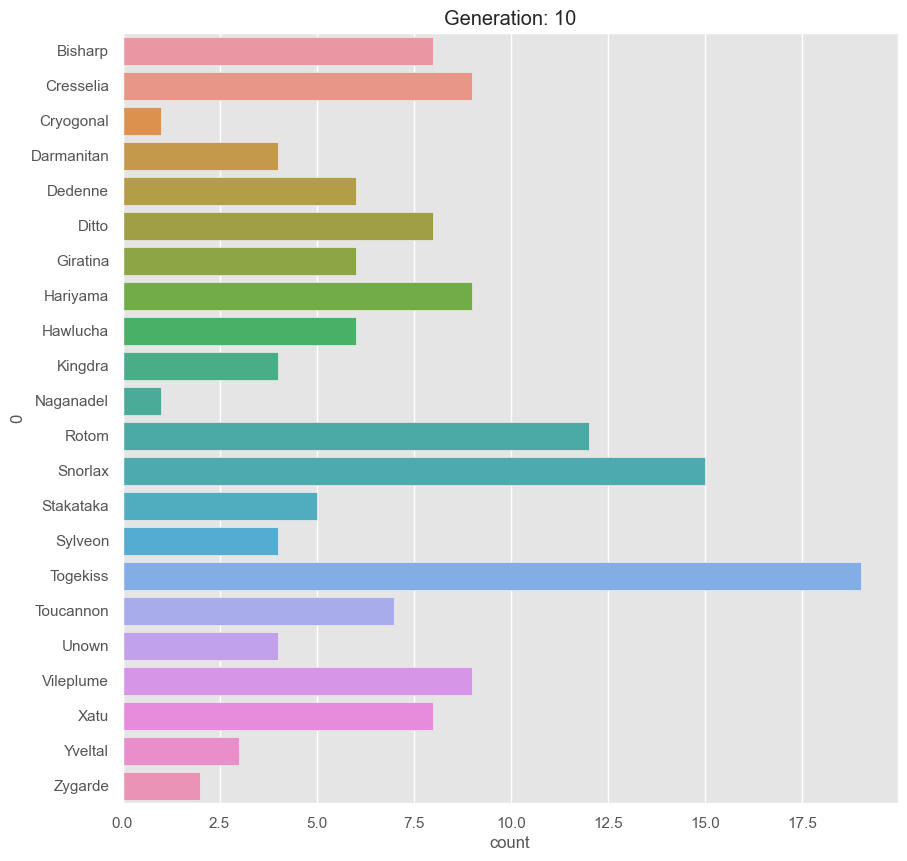

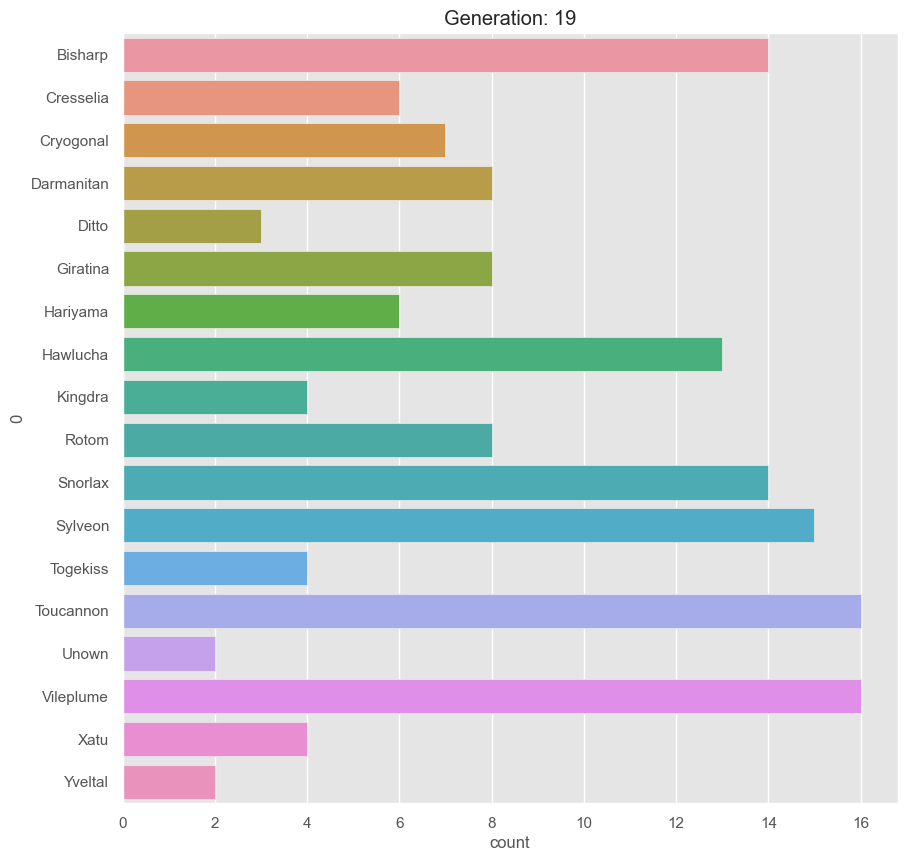

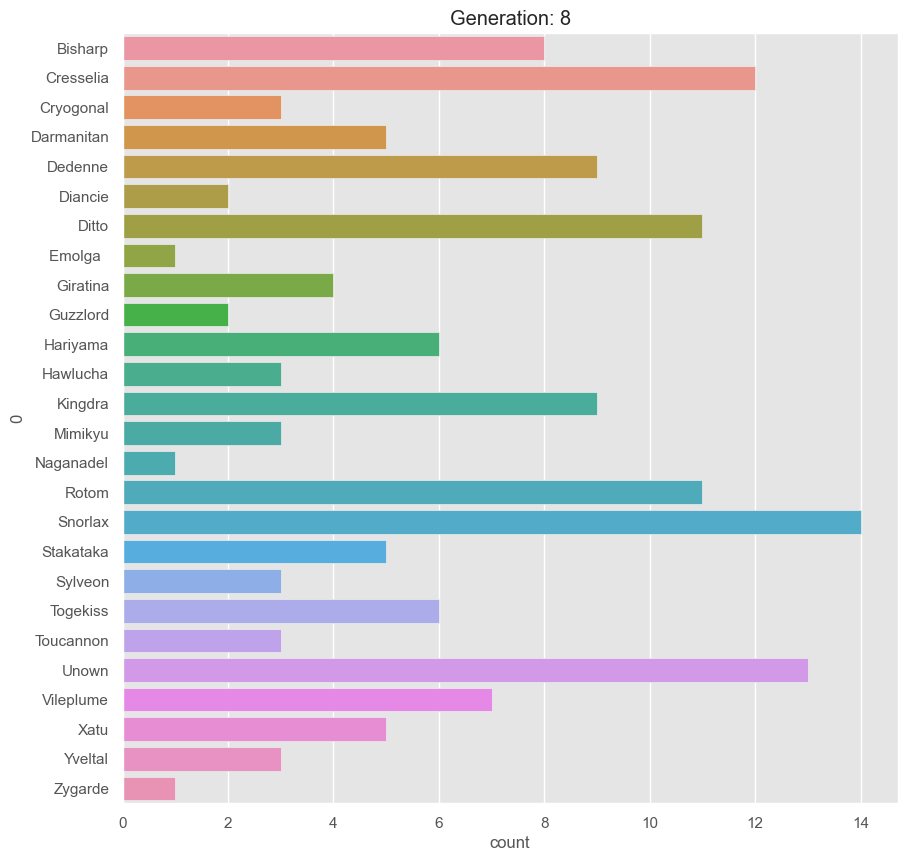

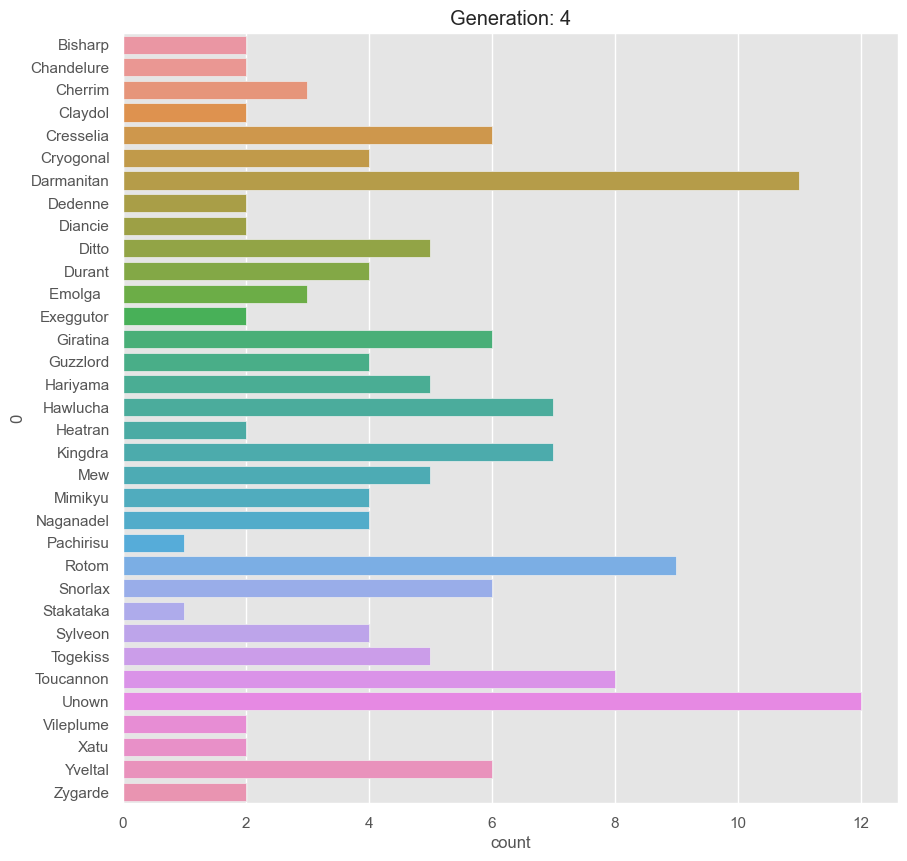

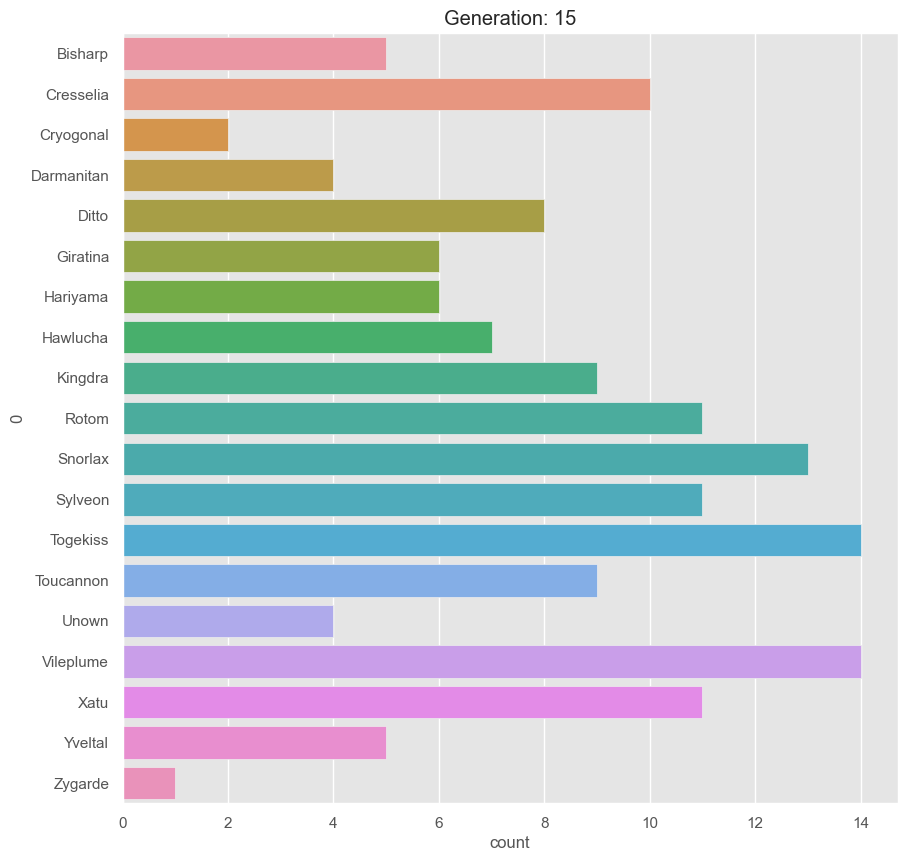

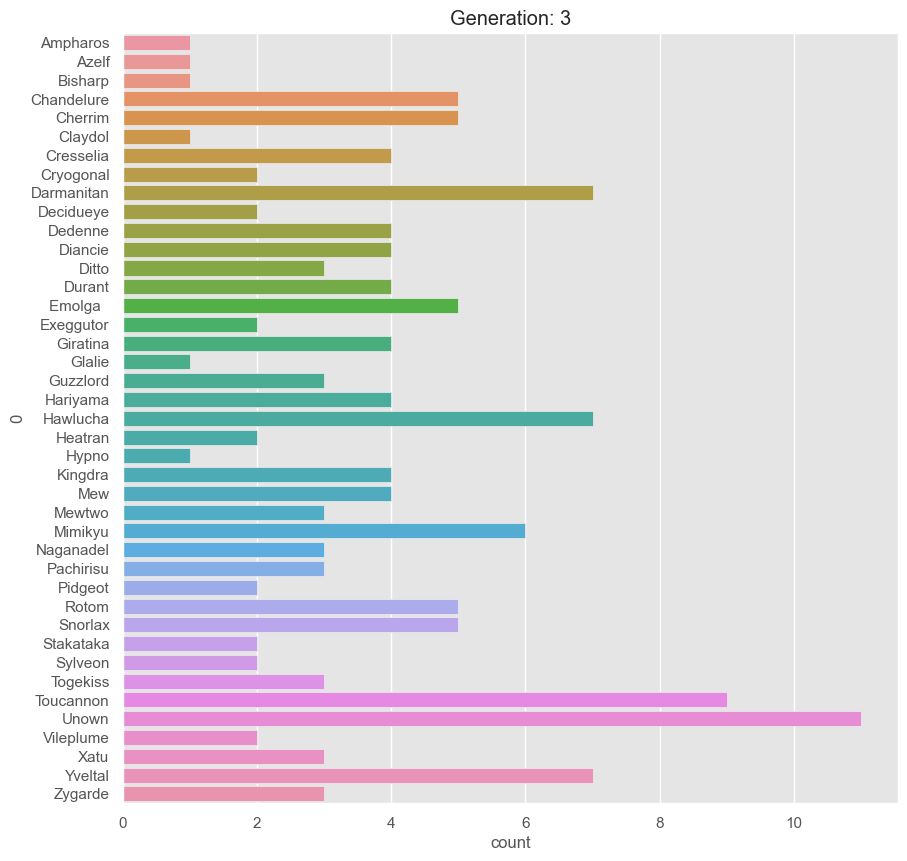

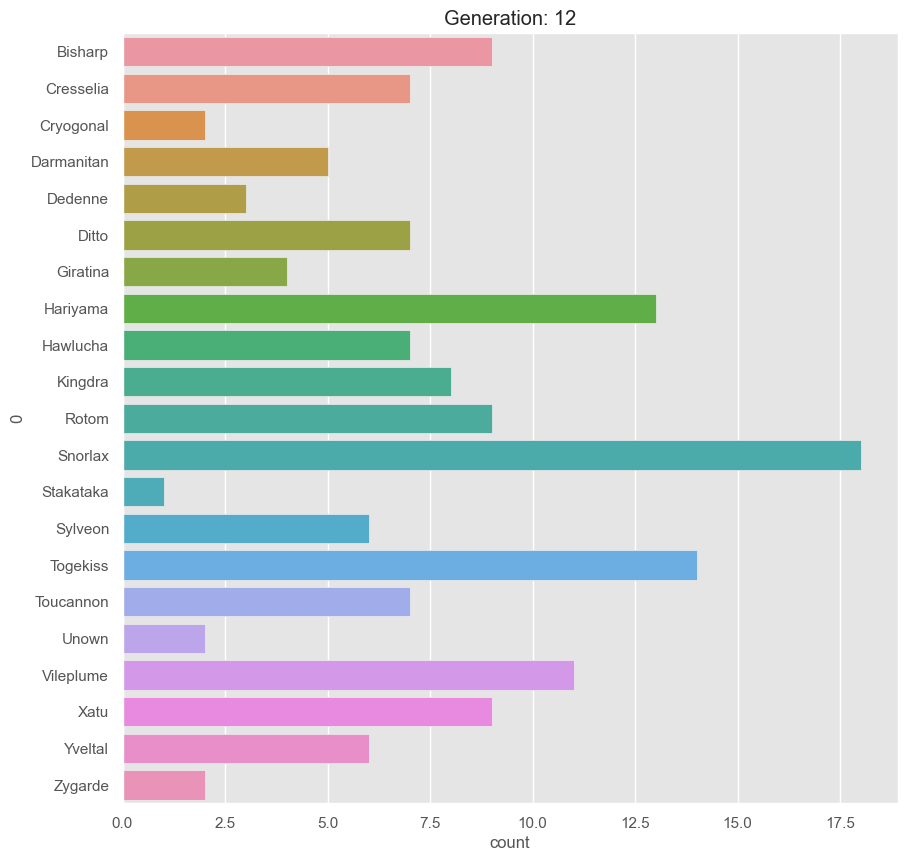

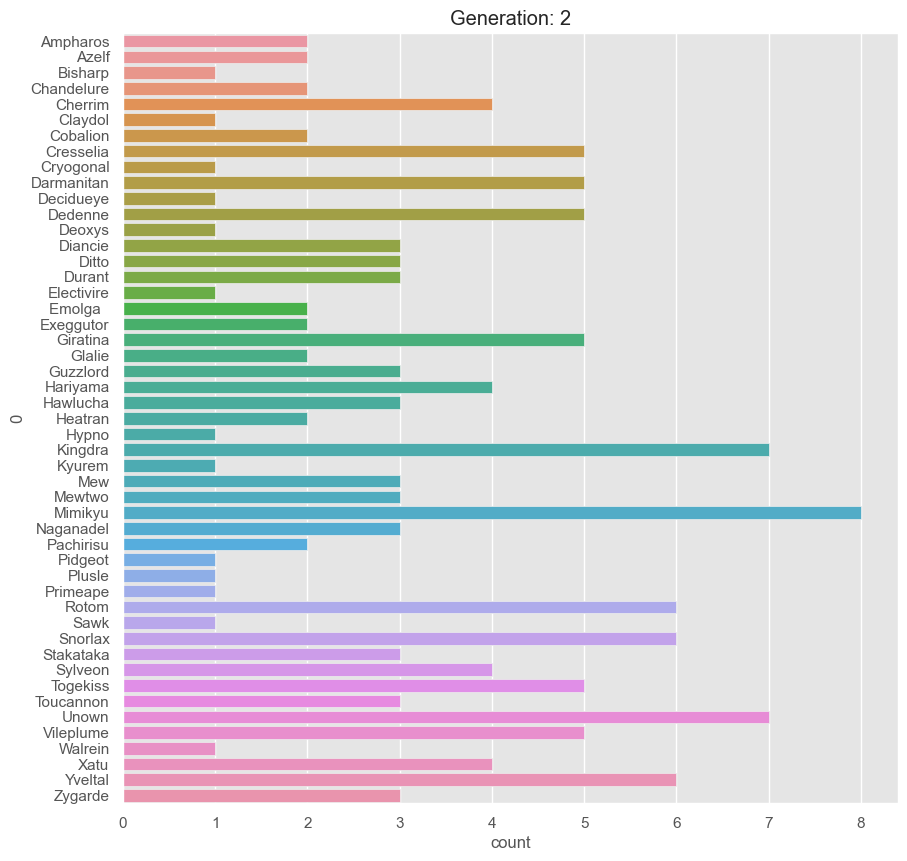

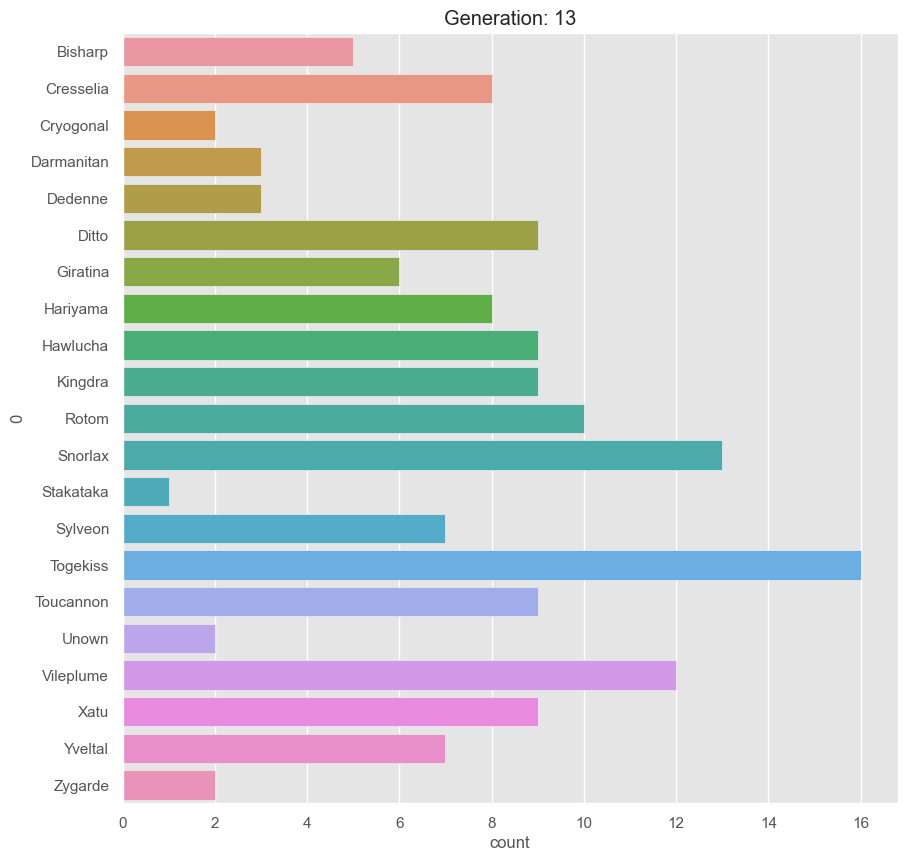

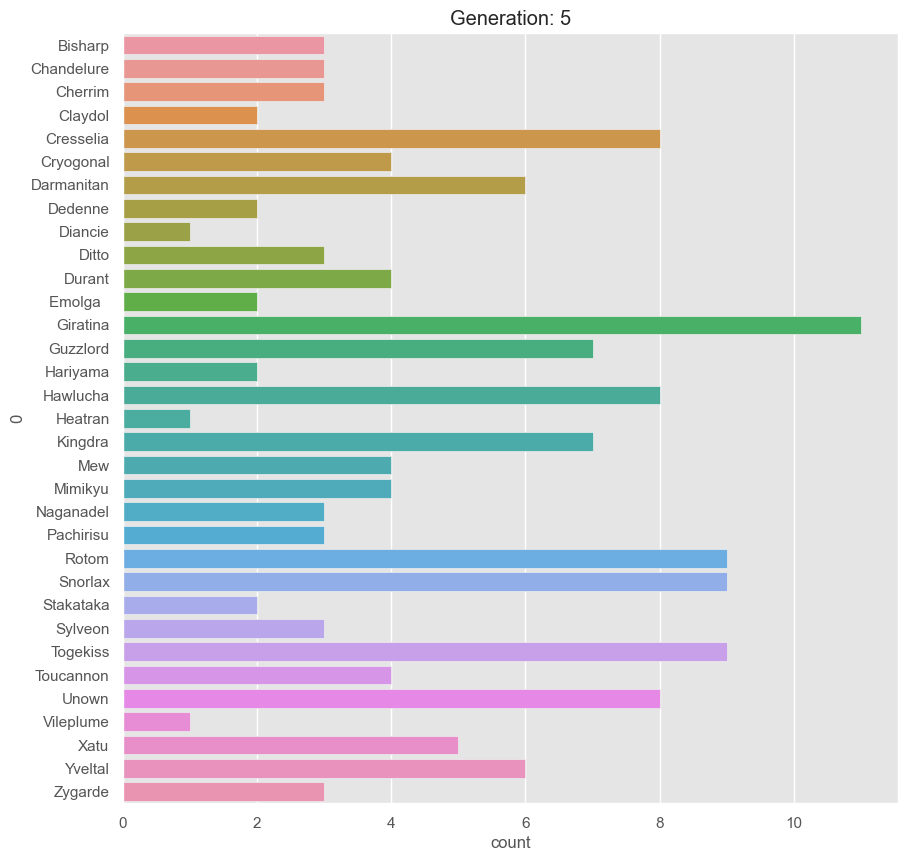

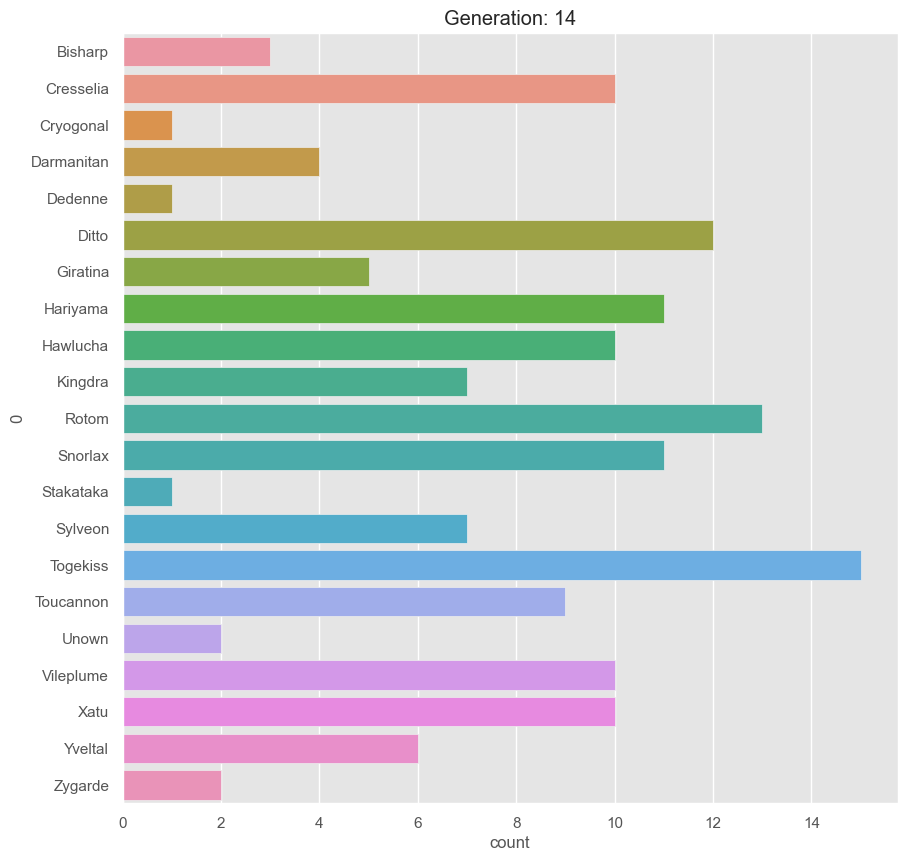

In [4]:
tmp = data.groupby(["0", "generation"])["0"].count().reset_index(name="count")
for gen in data.generation.unique():
    fig, ax = plt.subplots(1, figsize=(10, 10), dpi=100)
    sns.barplot(data=tmp[tmp["generation"] == gen], y="0", x="count", ax=ax)
    ax.set_title(f"Generation: {gen}")
    fig.savefig(f"{gen}.png")